# Example of how to use the Dataset class and some sequences visualization

    1. imports

In [1]:
import torch
# import matplotlib.pyplot as plt

# from torchvision.utils import save_image
from torch.utils.data import DataLoader
# import pandas as pd
import numpy as np
# from tqdm import tqdm
# import os
import time

# from src.moving_MNIST import MovingMNIST
from src.visualization import plot_sequence, plot_on_spot
from src.dataset import MovingMnistDataset

    2. Create Dataset and DataLoader instances

In [2]:
mm = MovingMnistDataset(path='data/train/', n_frames=12, shuffle=True)
dl = DataLoader(mm)

    3. Some data visualization

Window number: 1. Current sequence: 0


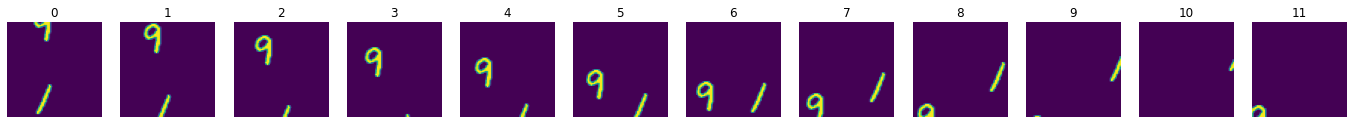

Window number: 2. Current sequence: 0


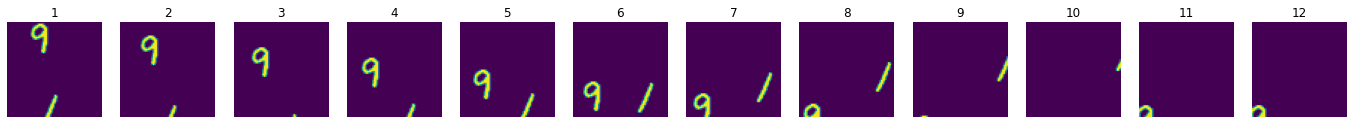

Window number: 3. Current sequence: 0


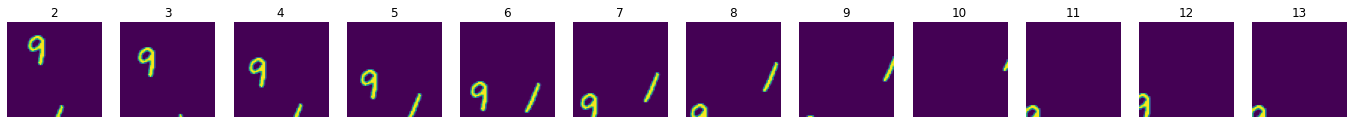

Window number: 4. Current sequence: 0


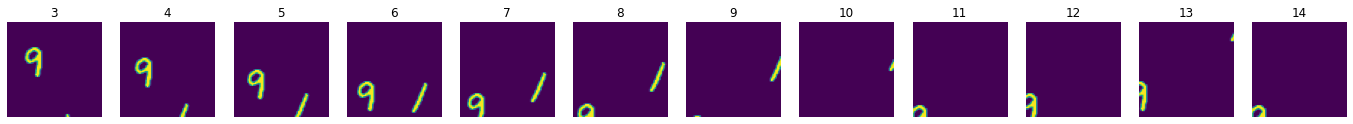

Window number: 5. Current sequence: 0


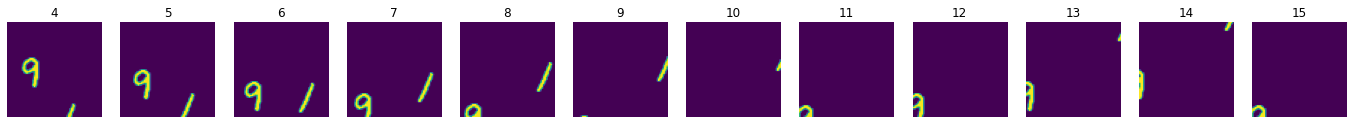

Window number: 6. Current sequence: 0


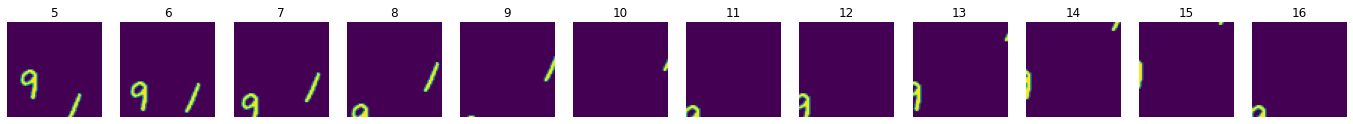

Window number: 7. Current sequence: 0


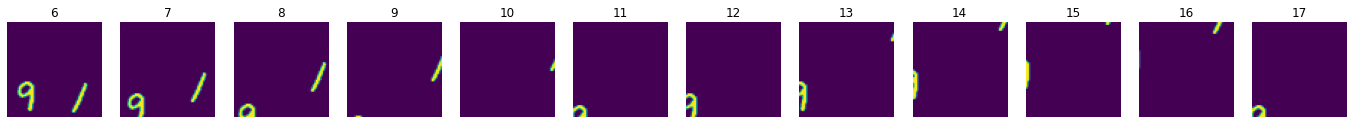

Window number: 8. Current sequence: 0


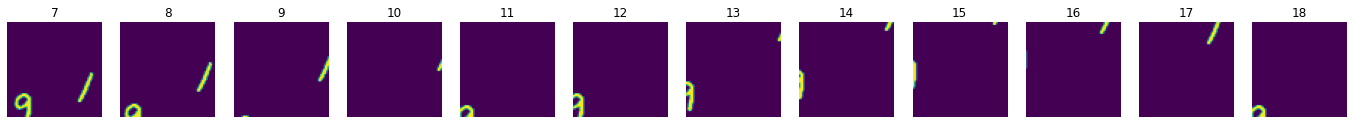

Window number: 9. Current sequence: 0


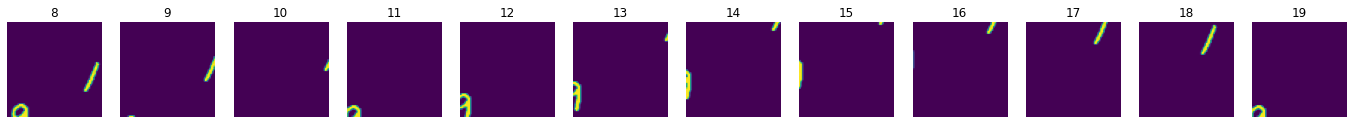

Window number: 10. Current sequence: 1


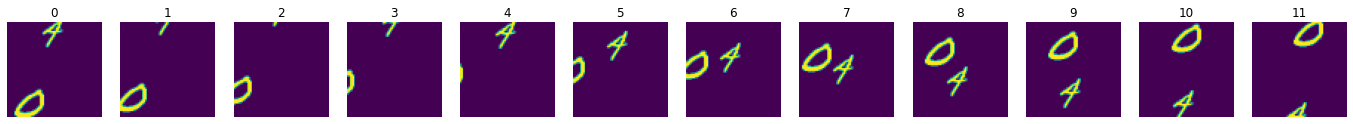

In [6]:
# Using n_frames=12 with sequences of L=20 we get 8 moving windows for each sequence:
control = 1
for curr_seq, idxs, frames_in, frames_out in dl:
    # concat the sequences to plot
    sequence = torch.cat((frames_in, frames_out), dim=1).squeeze().numpy()
    # send idxs to Numpy
    idxs = idxs.squeeze().numpy()
    
    print(f'Window number: {control}. Current sequence: {int(curr_seq.numpy())}')
    plot_sequence(sequence, idxs)
    if control == 10:
        break
    control += 1


The example shows what was expected: we get 9 windows for sequence 0, and then changes to the next sequence.

Next we will test the speed of the loading implementation for a dataset of 1000 sequences of length 20

In [7]:
start = time.time()
for curr_seq, idxs, frames_in, frames_out in dl:
    pass
end = time.time()
print(f'Going through the dataset took {end - start} seconds on cpu.')

Going through the dataset took 7.9796037673950195 seconds on cpu.


    4. With this function one can test speed of the digits on the dataset 

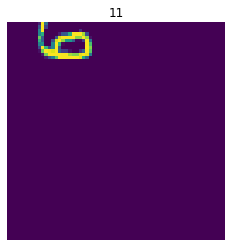

In [10]:
for curr_seq, idxs, frames_in, frames_out in dl:
    # concat the sequences to plot
    sequence = torch.cat((frames_in, frames_out), dim=1).squeeze().numpy()
    # send idxs to Numpy
    idxs = idxs.squeeze().numpy()
    
    plot_on_spot(sequence, idxs)
    break